In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing
load data to variable *X* 

<Axes: >

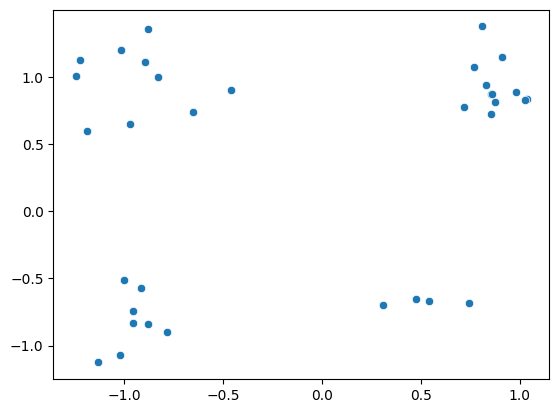

In [13]:
X=np.load("X.npy")
sns.scatterplot(x=X[:,1], y=X[:,0])

# K-means Algorithm


In [ ]:


##Below we define a function to help us calculate distance between a centroid and a point in the data

def euclidean_dist(centroid,datapoint):
    difference=centroid-datapoint
    insideSqrt=difference[0]**2+difference[1]**2
    distance=np.sqrt(insideSqrt)
    return distance

def k_means(data, k):
    cluster_assignments=pd.DataFrame({
        'x_0': data[:, 0],
        'x_1': data[:, 1],
        'cluster': np.zeros(len(data))   
    })
    history=[]
    centroids=data[np.random.choice(data.shape[0], k, replace=False)]  
    while True:       
        for i in range(len(data)):
            distances=[euclidean_dist(centroid, data[i]) for centroid in centroids]
            cluster_assignments.at[i, 'cluster']=np.argmin(distances)
        history.append(cluster_assignments.copy()) 
        new_centroids=[]
        for cluster in range(k):
            cluster_points=data[cluster_assignments['cluster']==cluster]
            if len(cluster_points)>0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                new_centroids.append(centroids[cluster])  

        if np.allclose(centroids, new_centroids):
            break   
        centroids=np.array(new_centroids)

    return cluster_assignments, history
    

## Visualise algorithm result

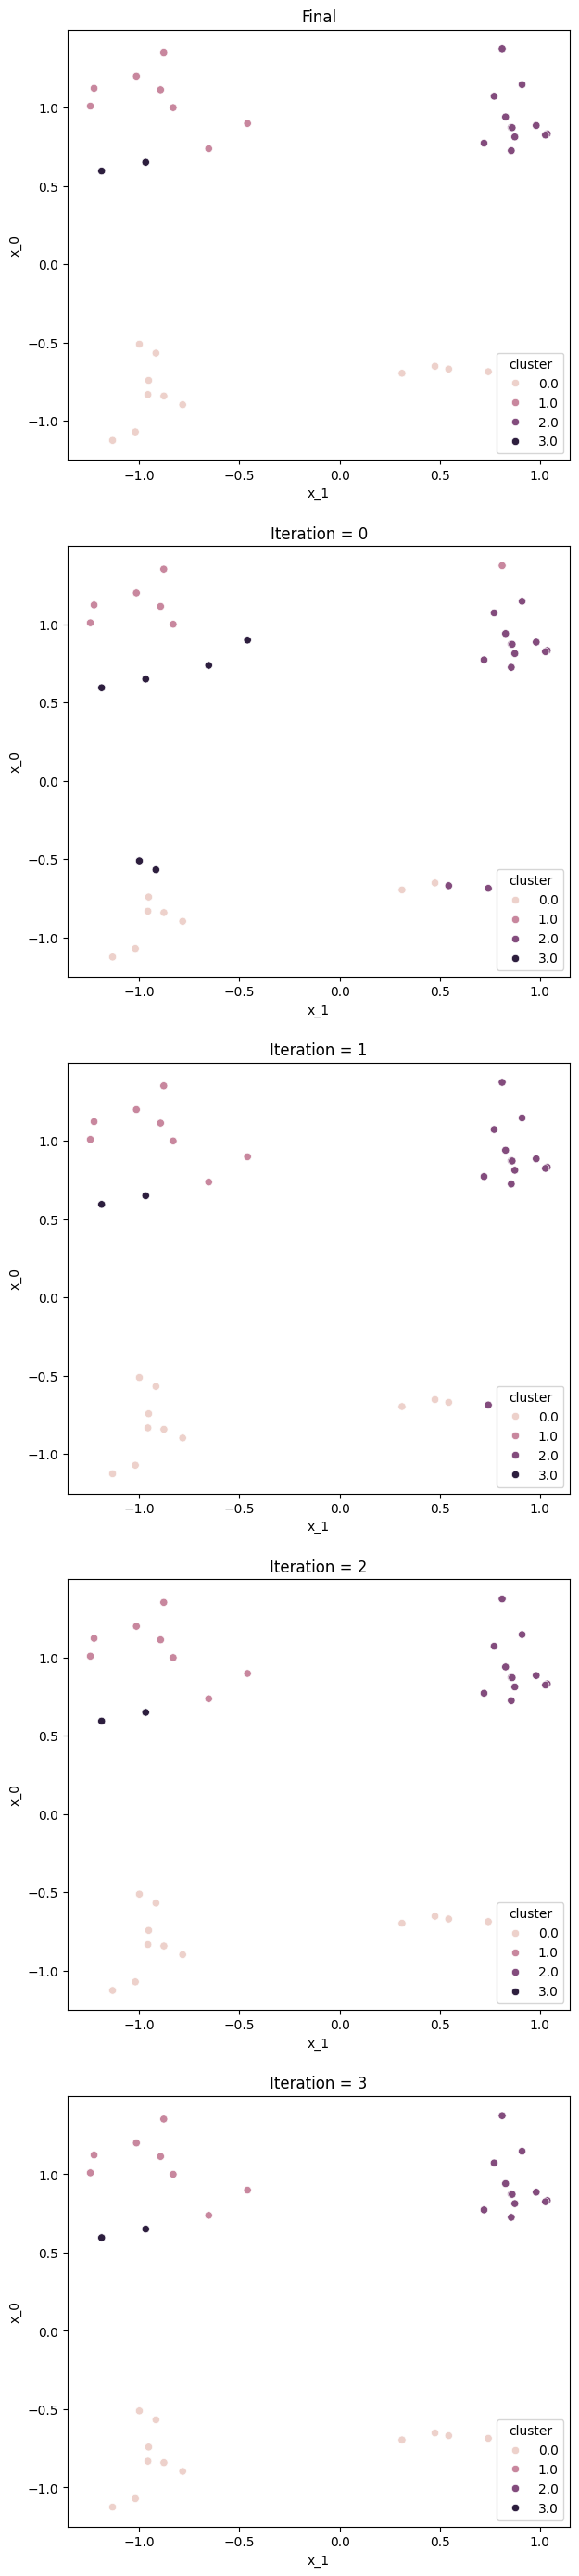

In [15]:
cluster_assignments,history=k_means(X, 4)
n_plots=len(history)+1
fig, axs=plt.subplots(n_plots, figsize=(7, 7*n_plots))

axs[0].set_title("Final")
sns.scatterplot(cluster_assignments, x="x_1", y="x_0", hue="cluster", ax=axs[0])
for i, curr_df in enumerate(history):
    axs[i+1].set_title(f"Iteration = {i}")
    sns.scatterplot(curr_df, x="x_1", y="x_0", hue="cluster", ax=axs[i+1])


# Elbow Method for estimating best K

We use a funtion called `objective_func` to calculate the sum of squared distances of each point to its assigned mean.

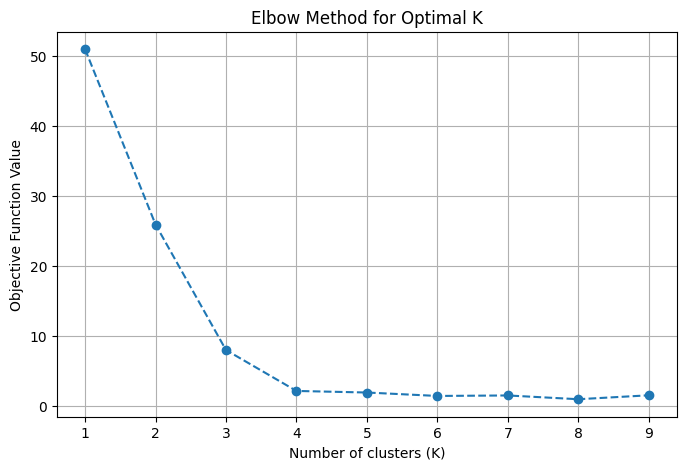

In [16]:
def objective_function(cluster_assignments):
   #recomputed centroids
    centroids=(cluster_assignments.groupby('cluster')[['x_0', 'x_1']].mean().to_dict('index'))
    total_squared_distance=0.0
    for i, row in cluster_assignments.iterrows():
        x, y=row['x_0'], row['x_1']
        cluster=int(row['cluster'])
        centroid=centroids[cluster]
        
        squared_distance=(x - centroid['x_0'])**2 + (y - centroid['x_1'])**2
        total_squared_distance+=squared_distance
    
    return total_squared_distance


K_values = range(1, 10)  
objective_values = []

for K in K_values:
    cluster_assignments, history=k_means(X, K)
    obj_value=objective_function(cluster_assignments)
    objective_values.append(obj_value)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_values, objective_values, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Objective Function Value")
plt.xticks(K_values)
plt.grid(True)
plt.show()